In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
data_x = np.linspace(-10.0, 10.0, 100)[:, np.newaxis]
data_y = 29*data_x + 20*np.random.randn(100,1)
data_x = data_x/np.max(data_x)
data_x = np.hstack((np.ones_like(data_x), data_x))
print(data_x)

[[ 1.         -1.        ]
 [ 1.         -0.97979798]
 [ 1.         -0.95959596]
 [ 1.         -0.93939394]
 [ 1.         -0.91919192]
 [ 1.         -0.8989899 ]
 [ 1.         -0.87878788]
 [ 1.         -0.85858586]
 [ 1.         -0.83838384]
 [ 1.         -0.81818182]
 [ 1.         -0.7979798 ]
 [ 1.         -0.77777778]
 [ 1.         -0.75757576]
 [ 1.         -0.73737374]
 [ 1.         -0.71717172]
 [ 1.         -0.6969697 ]
 [ 1.         -0.67676768]
 [ 1.         -0.65656566]
 [ 1.         -0.63636364]
 [ 1.         -0.61616162]
 [ 1.         -0.5959596 ]
 [ 1.         -0.57575758]
 [ 1.         -0.55555556]
 [ 1.         -0.53535354]
 [ 1.         -0.51515152]
 [ 1.         -0.49494949]
 [ 1.         -0.47474747]
 [ 1.         -0.45454545]
 [ 1.         -0.43434343]
 [ 1.         -0.41414141]
 [ 1.         -0.39393939]
 [ 1.         -0.37373737]
 [ 1.         -0.35353535]
 [ 1.         -0.33333333]
 [ 1.         -0.31313131]
 [ 1.         -0.29292929]
 [ 1.         -0.27272727]
 

In [3]:
order = np.random.permutation(len(data_x))
portion = 20

In [4]:
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]
print (test_x.shape, train_x.size, test_y.size, train_y.size)

(20, 2) 160 20 80


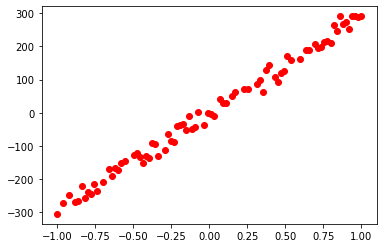

In [5]:
plt.scatter(train_x[:,1], train_y, c='r', label='Data')

In [6]:
def get_gradient(w, x, y):
    y_estimate = (x.dot(w)).flatten() #hypothesis
    error = (y.flatten() - y_estimate) 
    mse = (1.0/len(x))*np.sum(np.power(error,2)) # mse
    gradient = -(1.0/len(x)) * error.dot(np.power(x,1))         # gradient
    return gradient, mse

In [7]:
w = np.random.randn(2) # Random Intialization
alpha = 0.15 # learning rate
tolerance = 1e-3 # param for stopping the loop
print("Intial values of Weights:")
print(w[1], w[0])
# Perform Gradient Descent
iterations = 1
while True:
    gradient, error = get_gradient(w, train_x, train_y)
    new_w = w - alpha * gradient
#     print(gradient)
    
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print ("Converged")
        break
    
    # Print error every 10 iterations
    if iterations % 10 == 0:
        print ("Iteration: %d - Error: %.4f" %(iterations, error))
        print ("Updated Weights : {:f} , {:f}".format(w[1], w[0]))
    iterations += 1
    w = new_w

print ("Final Weights : {:f} , {:f}".format(w[1], w[0]))
print ("Test Cost =", get_gradient(w, test_x, test_y)[1])

Intial values of Weights:
-1.5322467660715247 -0.5103616396819821
Iteration: 10 - Error: 11717.0944
Updated Weights : 110.675896 , 3.003615
Iteration: 20 - Error: 4221.0843
Updated Weights : 185.770077 , 2.350929
Iteration: 30 - Error: 1649.6992
Updated Weights : 229.742555 , 1.307605
Iteration: 40 - Error: 767.2282
Updated Weights : 255.499326 , 0.566407
Iteration: 50 - Error: 464.3584
Updated Weights : 270.587875 , 0.106622
Iteration: 60 - Error: 360.4110
Updated Weights : 279.427196 , -0.167764
Iteration: 70 - Error: 324.7353
Updated Weights : 284.605593 , -0.329499
Iteration: 80 - Error: 312.4911
Updated Weights : 287.639300 , -0.424445
Iteration: 90 - Error: 308.2888
Updated Weights : 289.416567 , -0.480106
Iteration: 100 - Error: 306.8466
Updated Weights : 290.457760 , -0.512722
Iteration: 110 - Error: 306.3516
Updated Weights : 291.067733 , -0.531831
Iteration: 120 - Error: 306.1817
Updated Weights : 291.425080 , -0.543026
Iteration: 130 - Error: 306.1234
Updated Weights : 291.6

In [8]:
print("Final eqn / hypothesis looks like:")
print('y = {:f}.x + {:f}'.format(w[1], w[0]))

Final eqn / hypothesis looks like:
y = 291.912194.x + -0.558287


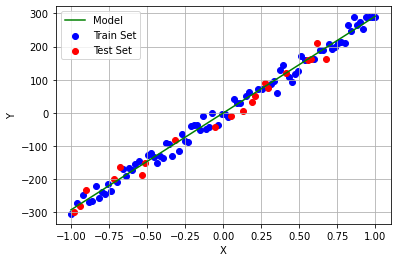

In [9]:
plt.plot(data_x[:,1], (data_x).dot(w), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()